# Correlation Length of Random Clusters
## Packages and Config

In [1]:
include("../Percolation.jl")
using Plots, ColorSchemes, LaTeXStrings, DelimitedFiles, Statistics, LsqFit
figpath = "../../fig/percolation/"

"../../fig/percolation/"

## Correlation Length $\xi$

### Full Range

In [42]:
len, samples, runs = 320, 50, 1000

(320, 50, 1000)

In [129]:
probs = collect(range(0, 1, length=samples))
ξavg, ξσ = zeros(samples), zeros(samples)

for run in 1:runs
    randgrid = rand(len, len)
    for sample in 1:samples
        grid = randgrid .<= probs[sample]
        ξ = Percolation.clustgyration(grid)
        ξavg[sample] += ξ
        ξσ[sample] += ξ ^ 2
    end
end

ξavg ./= runs
# absolute value added to ensure no negative numbers resulting from floating-point error at small σ
ξσ = .√(abs.(ξσ ./ runs - ξavg .^ 2))

# save data
open("correlation-length-data/gyration-full-$len.txt", "w") do io
    writedlm(io, [probs ξavg ξσ])
end

In [43]:
# load data from previous runs
data = readdlm("correlation-length-data/gyration-full-$len.txt")
probs, ξavg, ξσ = data[:, 1], data[:, 2], data[:, 3]

([0.0, 0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.10204081632653061, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.1836734693877551  …  0.8163265306122449, 0.8367346938775511, 0.8571428571428571, 0.8775510204081632, 0.8979591836734694, 0.9183673469387755, 0.9387755102040817, 0.9591836734693877, 0.9795918367346939, 1.0], [0.0, 0.7719608982897664, 1.0015402336509953, 1.1735169883761065, 1.3076170018579305, 1.5149674739043908, 1.6721344361064572, 1.862551994252154, 1.9979939742768114, 2.2145313265089284  …  0.9992092857667692, 0.8333647343910863, 0.6583567478260819, 0.43767456736444166, 0.1869045751036689, 0.07535902833772008, 0.0232915619758885, 0.005, 0.0, 0.0], [0.0, 0.12836031906962583, 0.13971864120547786, 0.16841762518631936, 0.18948997556667332, 0.22289487174917919, 0.23777160465849456, 0.2715685268287964, 0.29377823509324547, 0.40042298783308156  …  0.26767459315901665, 0.24263669283801503, 0.25982105796302496, 0.34859

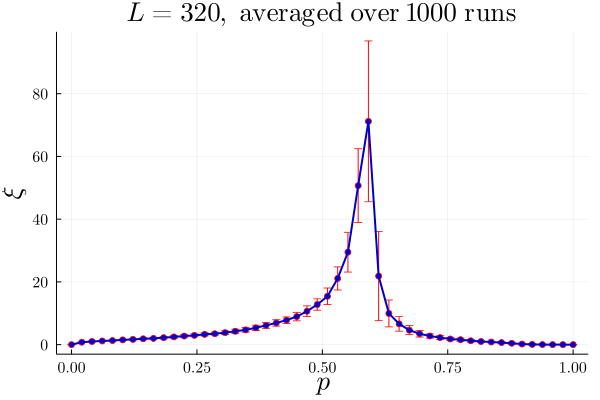

In [44]:
p = scatter(probs, ξavg, yerr=ξσ, markerstrokecolor=:red,
    color=:mediumblue, lw=2, legend=false, fontfamily="Computer Modern",
    title=L"L=%$len,\ \textrm{averaged\ over\ %$runs \ runs}", xlabel=L"p", ylabel=L"\xi",
    titlefontsize=18, tickfontsize=10, labelfontsize=18)
plot!(p, probs, ξavg, color=:mediumblue, lw=2)

savefig(p, figpath * "gyration-full-$len.pdf")
display(p)

### Precision Range

In [152]:
# use full range data to find narrow range for finding p_c and xi_max with better precision
maxgyr = argmax(ξavg)
gyrstep = probs[2] - probs[1]
minprob, maxprob = probs[maxgyr - 1], probs[maxgyr + 1]

(0.5714285714285714, 0.6122448979591837)

In [3]:
# for larger L, using previous data we can get more precise results by narrowing the range even more
if len >= 200
    minprob = 0.58
    maxprob = 0.6
end

0.6

In [4]:
samples, runs = 51, 1000

(51, 1000)

In [7]:
probs = collect(range(minprob, maxprob, length=samples))
ξavg, ξσ = zeros(samples), zeros(samples)

for run in 1:runs
    randgrid = rand(len, len)
    for sample in 1:samples
        grid = randgrid .<= probs[sample]
        ξ = Percolation.clustgyration(grid)
        ξavg[sample] += ξ
        ξσ[sample] += ξ ^ 2
    end
end

ξavg ./= runs
# absolute value added to ensure no negative numbers resulting from floating-point error at small σ
ξσ = .√(abs.(ξσ ./ runs - ξavg .^ 2))

# save data
open("correlation-length-data/gyration-zoom-$len.txt", "w") do io
    writedlm(io, [probs ξavg ξσ])
end

In [131]:
# load data from previous runs
data = readdlm("correlation-length-data/gyration-zoom-$len.txt")
probs, ξavg, ξσ = data[:, 1], data[:, 2], data[:, 3]

([0.5612244897959183, 0.5624739691795085, 0.5637234485630988, 0.5649729279466889, 0.5662224073302791, 0.5674718867138692, 0.5687213660974594, 0.5699708454810496, 0.5712203248646397, 0.5724698042482299  …  0.6112036651395252, 0.6124531445231154, 0.6137026239067055, 0.6149521032902957, 0.6162015826738859, 0.617451062057476, 0.6187005414410662, 0.6199500208246564, 0.6211995002082465, 0.6224489795918368], [37.51212043311325, 38.79374914074361, 39.418327806144106, 41.17045923365175, 42.469335563931985, 43.94376716935245, 46.0915078973358, 47.597238750506875, 50.45752339014072, 51.590794015470465  …  19.462017273270288, 18.77137307423639, 17.909714308255214, 17.648259986603772, 16.472522522388502, 16.16616709253197, 15.530941880258986, 15.272140097212205, 14.26622129294491, 13.97913190410296], [6.876484710392823, 7.385977655738217, 7.336417257017223, 8.124105017415856, 10.116007364054358, 10.211714936120122, 11.227057126972092, 10.98215729264898, 11.963071841397769, 12.014039085378295  …  8.

In [8]:
# find peak
argpc = argmax(ξavg)
pc = probs[argpc]
ξmax = ξavg[argpc]
ξmaxerr = ξσ[argpc]

20.826592379048122

In [9]:
# save peak data
open("correlation-length-data/gyration-peak.txt", "a") do io
    writedlm(io, [len pc ξmax ξmaxerr])
end

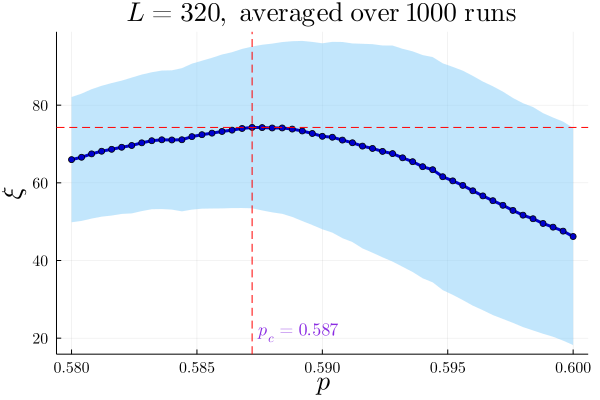

In [10]:
p = plot(probs, ξavg, ribbon=ξσ, fillcolor=:lightskyblue,
    color=:mediumblue, marker=:circle, lw=3, legend=false, fontfamily="Computer Modern",
    title=L"L=%$len,\ \textrm{averaged\ over\ %$runs \ runs}", xlabel=L"p", ylabel=L"\xi",
    titlefontsize=18, tickfontsize=10, labelfontsize=18)

vline!(p, [pc], color=:red, linestyle=:dash)
hline!(p, [ξmax], color=:red, linestyle=:dash)

annotetey = ylims(p)[1] + (ylims(p)[2] - ylims(p)[1]) / 15
annotatex = pc + (xlims(p)[2] - xlims(p)[1]) / 100
annotate!(p, annotatex, annotetey, text(L"p_c=%$(round(pc, digits=3))",
    :blueviolet, :left, :dash, 12))

savefig(p, figpath * "gyration-zoom-$len.pdf")
display(p)

## Critical Exponent $\nu$

In [13]:
# load biggest length (not using 320 because of the small number of runs) for more precise results
len = 320
data = readdlm("correlation-length-data/gyration-full-$len.txt")
probs, ξavg, ξσ = data[:, 1], data[:, 2], data[:, 3]

# get p_c
argpc = argmax(ξavg)
pc = probs[argpc]

# crop data
count = 7
ξcrop = ξavg[argpc+3:argpc+2+count]
probscrop = probs[argpc+3:argpc+2+count]

ξlog = log.(ξcrop)
probslog = log.(probscrop .- pc)

7-element Vector{Float64}:
 -2.793208009442518
 -2.505525936990736
 -2.2823823856765264
 -2.1000608288825715
 -1.945910149055313
 -1.812378756430791
 -1.6945957207744073

In [14]:
# loglog linear Regression for finding ν and its error
ν, coeff = hcat(probslog, ones(count)) \ ξlog
error = √(sum(x->x^2, ξlog - ν * probslog .- coeff) / (count - 2)
    / sum(x->x^2, probslog .- mean(probslog)))
print(ν, ' ', error)

-1.3161353035181456 0.01897928065996926

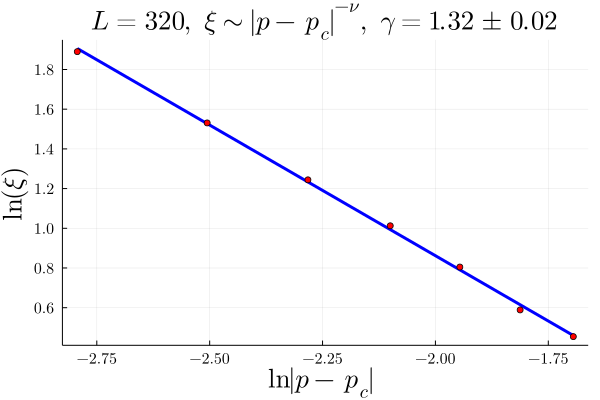

In [15]:
p = plot(x -> ν * x + coeff, probslog[1], probslog[end], color=:blue, lw=3, legend=false,
    fontfamily="Computer Modern", title="\$ L=$len,\\ \\xi \\sim |p - p_c|^{-\\nu},\\ "
    * "\\gamma = $(-round(ν, digits=2)) \\pm $(round(error, sigdigits=1))\$",
    xlabel=L"\mathrm{ln}|p - p_c|", ylabel=L"\mathrm{ln}(\xi)",
    titlefontsize=18, tickfontsize=10, labelfontsize=18)
scatter!(p, probslog, ξlog, color=:red)

savefig(p, figpath * "critical-exp.pdf")
display(p)

## Extrapolate $p_c(\infty)$ and $\nu$ 

In [16]:
# fitting function
@. gyration(data, params) = params[3] * abs(params[1] - data)^(-params[2])

gyration (generic function with 1 method)

In [17]:
# load data
data = readdlm("correlation-length-data/gyration-peak.txt")
lengths, pc = data[1:end, 1], data[1:end, 2]

([10.0, 20.0, 40.0, 80.0, 160.0, 320.0], [0.5233236151603499, 0.5503956684714703, 0.5695543523531862, 0.5770512286547271, 0.5837151187005415, 0.5872])

In [18]:
# non-linear fit
fit = curve_fit(gyration, pc, lengths, [0.59, 1.3, 0.1])
pc∞, ν, coefficient = coef(fit)[1], coef(fit)[2], coef(fit)[3]
print(pc∞, ' ', ν)

0.5924686870944867 1.3460390089139405

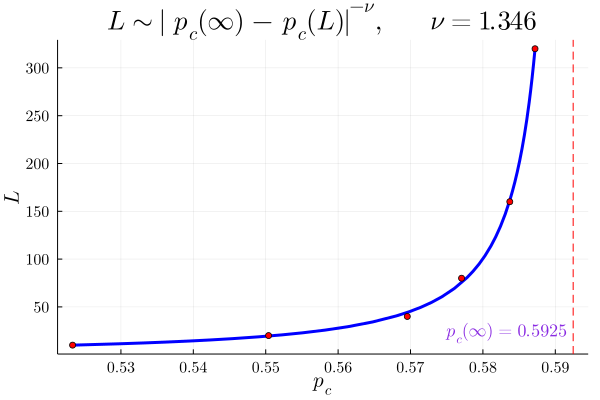

In [19]:
p = plot(x -> coefficient * abs(pc∞ - x)^(-ν), pc[1], pc[end],
    color=:blue, lw=3, legend=false, fontfamily="Computer Modern",
    title=L"L \sim |p_c(\infty) - p_c(L)|^{-\nu},\qquad \nu = %$(round(ν, sigdigits=4))",
    ylabel=L"L", xlabel=L"p_c", titlefontsize=18, tickfontsize=10, labelfontsize=14)
scatter!(p, pc, lengths, color=:red, ms=4)

vline!(p, [pc∞], color=:red, linestyle=:dash)
annotetey = ylims(p)[1] + (ylims(p)[2] - ylims(p)[1]) / 15
annotatex = pc∞ - (xlims(p)[2] - xlims(p)[1]) / 100
annotate!(p, annotatex, annotetey, text(L"p_c(\infty)=%$(round(pc∞, sigdigits=4))",
    :blueviolet, :right, :dash, 12))

savefig(p, figpath * "extrapolation.pdf")
display(p)